In [1]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
X_val = pd.read_csv('data/X_val.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')
X_val = pd.read_csv('data/y_val.csv')
X_apache = pd.read_csv('data/y_apache_test.csv')

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# define model
logreg = LogisticRegression(
    max_iter=1000,
    class_weight={1: 1},
    penalty='l1',
    solver='liblinear',
).fit(X_train, y_train.T.to_numpy()[0])

y_pred_log = logreg.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

y_pred_log_proba = logreg.predict_proba(X_test)[::,1]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
display(conf_matrix_log)

print(classification_report(y_test, y_pred_log, target_names=['healthy', 'critical care']))

array([[4618, 1076],
       [ 301, 1255]])

               precision    recall  f1-score   support

      healthy       0.94      0.81      0.87      5694
critical care       0.54      0.81      0.65      1556

     accuracy                           0.81      7250
    macro avg       0.74      0.81      0.76      7250
 weighted avg       0.85      0.81      0.82      7250



ROC-AUC: 0.89


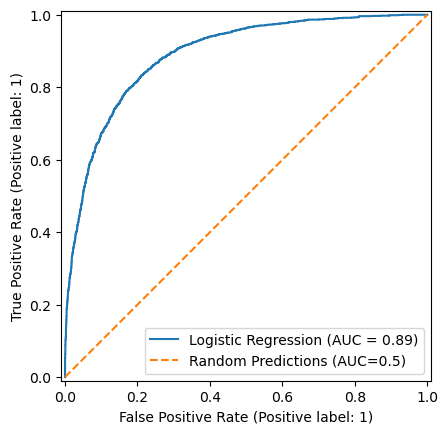

In [42]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt

# compute area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_log_proba)
print('ROC-AUC: {:.2f}'.format(roc_auc))

# plot ROC curve from predictions
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_log_proba, name='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle="--", label='Random Predictions (AUC=0.5)')
plt.legend()
plt.show()

average precision: 0.72


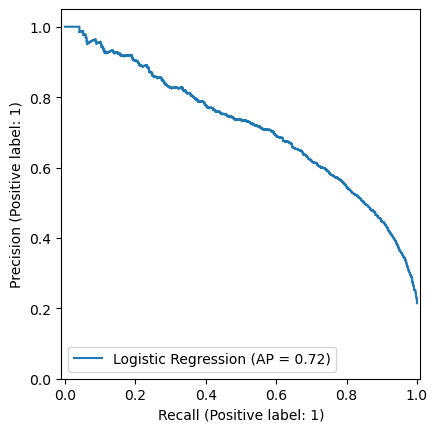

In [21]:
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay

# compute average precision
avg_precision = average_precision_score(y_true=y_test, y_score=y_pred_log_proba)
print('average precision: {:.2f}'.format(avg_precision))

# plot precision-recall curve
PrecisionRecallDisplay.from_predictions(y_true=y_test, y_pred=y_pred_log_proba, name='Logistic Regression')
plt.ylim(0,1.05)
plt.show()

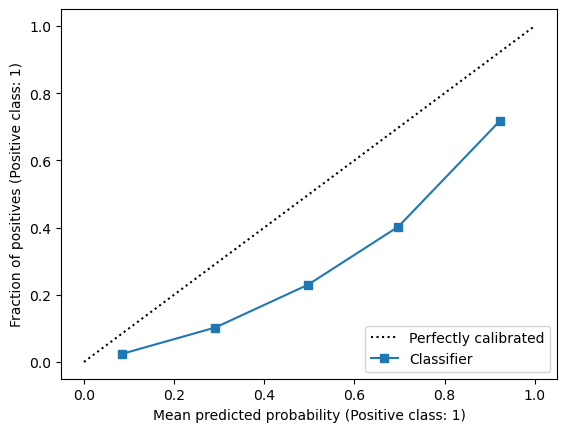

In [51]:
from sklearn.calibration import CalibrationDisplay

# plot calibration curve
disp = CalibrationDisplay.from_predictions(y_true=y_test, y_prob=y_pred_log_proba)
plt.show()

Score: -0.6539998663677775, Feature: 4; cat__ethnicity_Native American
Score: 0.6131787798139674, Feature: 12; cat__hospital_admit_source_Direct Admit
Score: -0.6220600507740146, Feature: 15; cat__hospital_admit_source_ICU
Score: 0.7001365231721198, Feature: 23; cat__hospital_admit_source_Step-Down Unit (SDU)
Score: -0.5655261012848678, Feature: 27; cat__icu_admit_source_Operating Room / Recovery
Score: 0.5024885897137794, Feature: 28; cat__icu_admit_source_Other Hospital
Score: 0.8265450598014195, Feature: 29; cat__icu_admit_source_Other ICU
Score: -1.226857996207128, Feature: 47; cat__apache_3j_bodysystem_Metabolic
Score: 0.6356085447318187, Feature: 49; cat__apache_3j_bodysystem_Neurological
Score: -1.0063728593233703, Feature: 56; num__elective_surgery
Score: 0.528415086514773, Feature: 64; num__apache_post_operative
Score: 0.6952100184357951, Feature: 65; num__arf_apache
Score: 0.6261214261162509, Feature: 69; num__fio2_apache
Score: 0.9370132569512556, Feature: 72; num__gcs_unabl

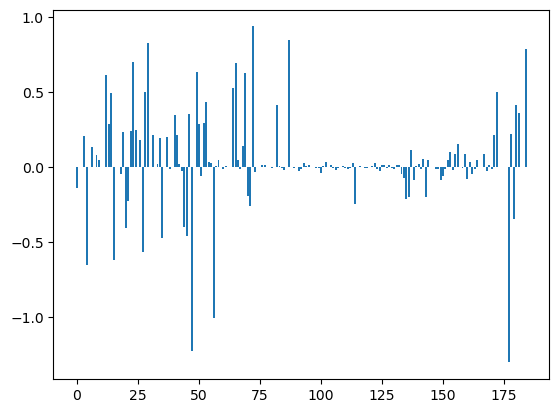

In [ ]:
coef = logreg.coef_[0]

for i,j in enumerate(coef):
    if (abs(j) > 0.5):
        print("Score: " + str(j) + ", Feature: " + str(i) + "; " + X_test.columns[i])

plt.bar([X for X in range(len(coef))], coef)
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import math

linreg = LinearRegression().fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

threshold = 0.5
y_pred_lin = [min(math.ceil(x - threshold), 1) for x in y_pred_lin.T[0]]

conf_matrix_lin = confusion_matrix(y_test, y_pred_lin)
display(conf_matrix_lin)

print(classification_report(y_test, y_pred_lin, target_names=['healthy', 'critical care']))

array([[4603, 1091],
       [ 311, 1245]])

               precision    recall  f1-score   support

      healthy       0.94      0.81      0.87      5694
critical care       0.53      0.80      0.64      1556

     accuracy                           0.81      7250
    macro avg       0.73      0.80      0.75      7250
 weighted avg       0.85      0.81      0.82      7250



In [ ]:
coef = linreg.coef_[0]

for i,j in enumerate(coef):
    if (abs(j) > 0.5):
        print("Score: " + str(j) + ", Feature: " + str(i) + "; " + X_test.columns[i])

plt.bar([X for X in range(len(coef))], coef)
plt.show()